In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import re
import csv
from datetime import datetime, timedelta

In [2]:
# detection parameters
Npix_min = 2025#20*6*5
Npix_max = 500*6*5
OW_thr_factor =-0.7

sigma = 9 # smoothing parameter

experiment_name = 'INALT60.L120-KRS0020'
data_resolution = '1d'

In [3]:
datestart, dateend = "2012-04-10", "2012-05-04"
#periods = [
#    ("2012-01-01", "2012-01-25"), ("2012-01-26", "2012-02-19"), ("2012-02-20", "2012-03-15"),
#    ("2012-03-16", "2012-04-09"), ("2012-04-10", "2012-05-04"), ("2012-05-05", "2012-05-29"),
#    ("2012-05-30", "2012-06-28"), ("2012-10-27", "2012-11-20"), ("2012-11-21", "2012-12-15"),
#    
#    ("2012-06-29", "2012-07-28"), ("2012-07-29", "2012-08-27"), ("2012-08-28", "2012-09-26"), ("2012-09-27", "2012-10-26"),
#]

In [4]:
depth= 0  #corresponding to... 
depth_index = 0 # tracking only on surface

#mesh_mask = xr.open_dataset('/gxfs_work/geomar/smomw355/model_data/ocean-only/INALT60.L120-KRS0020/nemo/suppl/2_INALT60.L120-KRS0020_mesh_mask.nc') 
#depth_information = [(round(mesh_mask.nav_lev.values[i]), i) for i in range(0, 64, 3)] #upper 1000m, otherwise: range(0, len(mesh_mask.nav_lev.values), 3)
#print(depth_information)

In [5]:
outpath = f'/gxfs_work/geomar/smomw523/eddytools/results/{experiment_name}/smoothed/{sigma}/{data_resolution}/depth-{depth}/'   ## !! SMOOTHED !!

data_path = '/gxfs_work/geomar/smomw355/model_data/ocean-only/INALT60.L120-KRS0020/nemo/'
mesh_mask = xr.open_dataset(data_path + 'suppl/2_INALT60.L120-KRS0020_mesh_mask.nc')

In [6]:
filename = f'Tracks_{datestart.replace("-", "")}_{dateend.replace("-", "")}_OW{np.abs(OW_thr_factor)}_Npix-{Npix_min}-{Npix_max}.pickle'
tracks = np.load(outpath + filename, allow_pickle=True)
start_date = datetime.strptime(re.search(r'Tracks_(\d{8})_', filename).group(1), '%Y%m%d')

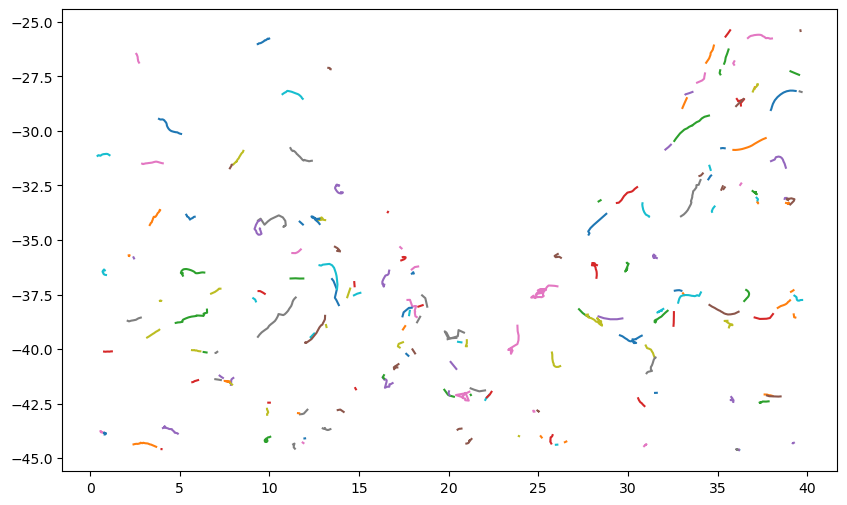

In [8]:
plt.figure(figsize=(10, 6))
for track in tracks:
    lon = track['lon']
    lat = track['lat']
    plt.plot(lon, lat)

In [9]:
tracks

[{'time': array(['2012-04-10T12:00:00.000000000', '2012-04-11T12:00:00.000000000',
         '2012-04-12T12:00:00.000000000'], dtype='datetime64[ns]'),
  'lon': array([36.20539847, 36.20369835, 36.19473429]),
  'lat': array([-44.62844062, -44.64220401, -44.63438613]),
  'amp': array([4.82829753e-06, 4.64324338e-06, 4.86953265e-06]),
  'eddy_j': {0: array([ 4,  4,  4, ..., 55, 55, 55]),
   1: array([ 3,  3,  3, ..., 54, 54, 54]),
   2: array([ 4,  4,  4, ..., 54, 54, 54])},
  'eddy_i': {0: array([2170, 2171, 2172, ..., 2170, 2171, 2172]),
   1: array([2161, 2162, 2163, ..., 2169, 2170, 2171]),
   2: array([2157, 2158, 2159, ..., 2170, 2171, 2172])},
  'area': array([4426.09291367, 4491.96164   , 4400.61584992]),
  'scale': array([37.53490551, 37.81316964, 37.42672214]),
  'type': 'anticyclonic',
  'exist_at_start': True,
  'terminated': True},
 {'time': array(['2012-04-10T12:00:00.000000000', '2012-04-11T12:00:00.000000000',
         '2012-04-12T12:00:00.000000000', '2012-04-13T12:00:00.

In [25]:
import numpy as np
from geopy.distance import geodesic
import pickle

# Geschwindigkeit für jeden Eddy berechnen und in tracks speichern
for eddy in tracks:
    times = eddy['time']
    lons = eddy['lon']
    lats = eddy['lat']
    
    speeds = [0]  # Erste Geschwindigkeit als NaN, da kein vorheriger Punkt existiert

    for i in range(1, len(times)):
        # Distanz in km berechnen
        dist_km = geodesic((lats[i-1], lons[i-1]), (lats[i], lons[i])).km
        
        # Zeitdifferenz in Stunden berechnen
        time_diff_h = (times[i] - times[i-1]) / np.timedelta64(1, 'h')
        
        # Geschwindigkeit in m/s
        speed = dist_km / time_diff_h * 3.6
        speeds.append(speed)
    
    # Geschwindigkeit als neues Attribut abspeichern
    eddy['speed'] = np.array(speeds)

with open(outpath + filename, "wb") as f:
    pickle.dump(tracks, f)



In [26]:
tracks

[{'time': array(['2012-04-10T12:00:00.000000000', '2012-04-11T12:00:00.000000000',
         '2012-04-12T12:00:00.000000000'], dtype='datetime64[ns]'),
  'lon': array([36.20539847, 36.20369835, 36.19473429]),
  'lat': array([-44.62844062, -44.64220401, -44.63438613]),
  'amp': array([4.82829753e-06, 4.64324338e-06, 4.86953265e-06]),
  'eddy_j': {0: array([ 4,  4,  4, ..., 55, 55, 55]),
   1: array([ 3,  3,  3, ..., 54, 54, 54]),
   2: array([ 4,  4,  4, ..., 54, 54, 54])},
  'eddy_i': {0: array([2170, 2171, 2172, ..., 2170, 2171, 2172]),
   1: array([2161, 2162, 2163, ..., 2169, 2170, 2171]),
   2: array([2157, 2158, 2159, ..., 2170, 2171, 2172])},
  'area': array([4426.09291367, 4491.96164   , 4400.61584992]),
  'scale': array([37.53490551, 37.81316964, 37.42672214]),
  'type': 'anticyclonic',
  'exist_at_start': True,
  'terminated': True,
  'speed': array([0.        , 0.23030838, 0.16841329])},
 {'time': array(['2012-04-10T12:00:00.000000000', '2012-04-11T12:00:00.000000000',
       